# Trabajo Practico 1: Análisis de Datos Meteorológicos

importamos las librerias a usar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Carga de datos:

#### 1.1. Importar el conjunto de datos utilizando Pandas.

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### 1.2. ¿Cuantas filas y columnas tiene el dataset?

In [3]:
filas, columnas = df.shape

print(f'Cantidad de filas: {filas}')
print(f'Cantidad de columnas: {columnas}')

Cantidad de filas: 145460
Cantidad de columnas: 23


#### 1.3. ¿Qué atributos presenta el dataset y qué describen? ¿Qué tipos de datos tiene cada atributo?

In [4]:
print('Los atributos del dataset son:\n')
print(f'{df.columns}\n')
print('Los atributos representan datos meteorológicos de diversas ubicaciones de Australia')

Los atributos del dataset son:

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Los atributos representan datos meteorológicos de diversas ubicaciones de Australia


In [5]:
print('Los tipos de datos de los atributos son:\n')
print(f'{df.dtypes}')

Los tipos de datos de los atributos son:

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


#### 1.4. Verifica la consistencia de los tipos de datos y realizar conversiones si es necesario.

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

print('Los tipos de datos corregidos de los atributos son:\n')
print(f'{df.dtypes}')

Los tipos de datos corregidos de los atributos son:

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object


#### 1.5. ¿Existen valores faltantes en algunos atributos? ¿Cuáles son las tres columnas con más valores faltantes y cuál es el porcentaje de valores faltantes en cada una?

In [7]:
cantidad_null = df.isnull().sum()
print('La cantidad de valores faltantes de cada atributo es:\n')
print(cantidad_null, '\n')
print('por lo cual si existen valores faltantes en el dataset')

La cantidad de valores faltantes de cada atributo es:

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64 

por lo cual si existen valores faltantes en el dataset


In [8]:
top3_null = cantidad_null.sort_values(ascending=False).head(3)

print('Las 3 columnas con más valores faltantes son:\n')
print(top3_null)

Las 3 columnas con más valores faltantes son:

Sunshine       69835
Evaporation    62790
Cloud3pm       59358
dtype: int64


In [9]:
porcentaje_null = (top3_null / df.shape[0]) * 100

print('El % de valores faltantes de las 3 columnas con más valores faltantes:\n')
print(porcentaje_null)

El % de valores faltantes de las 3 columnas con más valores faltantes:

Sunshine       48.009762
Evaporation    43.166506
Cloud3pm       40.807095
dtype: float64


#### 1.6. Para las columnas numéricas, obtener métricas de estadística descriptiva (media, mediana y cuartiles). Hint: usa el método `.describe()`.

In [10]:
print('Los datos estadísticos del dataset son: (considerar que la mediana es el cuartil 50%) \n')
df.describe()


Los datos estadísticos del dataset son: (considerar que la mediana es el cuartil 50%) 



,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,2013-04-04 21:08:51.907053568,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
min,2007-11-01 00:00:00,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,2011-01-11 00:00:00,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,2013-06-02 00:00:00,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,2015-06-14 00:00:00,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,2017-06-25 00:00:00,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000
std,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665


### 2. Limpieza y Preprocesamiento de datos:

#### 2.1. Ordenar el dataset por ciudad y fecha de forma ascendente.

In [11]:
df = df.sort_values(by=['Location', 'Date'], ascending=[True, True])
print('Los datos del dataset ordenados por ubicación y fecha son: \n')
df.head()

Los datos del dataset ordenados por ubicación y fecha son: 



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
96320,2008-07-01,Adelaide,8.8,15.7,5.0,1.6,2.6,NW,48.0,SW,...,92.0,67.0,1017.4,1017.7,NaN,NaN,13.5,14.9,Yes,No
96321,2008-07-02,Adelaide,12.7,15.8,0.8,1.4,7.8,SW,35.0,SSW,...,75.0,52.0,1022.4,1022.6,NaN,NaN,13.7,15.5,No,No
96322,2008-07-03,Adelaide,6.2,15.1,0.0,1.8,2.1,W,20.0,NNE,...,81.0,56.0,1027.8,1026.5,NaN,NaN,9.3,13.9,No,No
96323,2008-07-04,Adelaide,5.3,15.9,0.0,1.4,8.0,NNE,30.0,NNE,...,71.0,46.0,1028.7,1025.6,NaN,NaN,10.2,15.3,No,No
96324,2008-07-05,Adelaide,9.8,15.4,0.0,NaN,0.9,N,30.0,NNE,...,56.0,67.0,1023.6,1020.2,NaN,NaN,11.3,13.8,No,NaN


#### 2.2. Complete los valores faltantes de todas las columnas menos `RainToday`, `RainTomorrow`, `Cloud9am` y `Cloud3pm` usando [FowardFill](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html).

In [12]:
columnas_excluir = ['RainToday', 'RainTomorrow', 'Cloud9am', 'Cloud3pm']
df_rellenar = df.drop(columns=columnas_excluir)
df_rellenar = df_rellenar.ffill()
df = pd.concat([df_rellenar, df[columnas_excluir]], axis=1)

print('La nueva cantidad de columnas con null es: \n')
cantidad_null = df.isnull().sum()
print(cantidad_null, '\n')

La nueva cantidad de columnas con null es: 

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Cloud9am         55888
Cloud3pm         59358
dtype: int64 



#### 2.3. Modifique en las columnas `RainToday` y `RainTomorrow` reemplazando `Yes` con `1` y `No` con `0`.

In [13]:
df[['RainToday', 'RainTomorrow']] = df[['RainToday', 'RainTomorrow']].replace({'Yes': 1, 'No': 0})

df[['RainToday', 'RainTomorrow']].head()

/tmp/ipykernel_135835/3091496467.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['RainToday', 'RainTomorrow']] = df[['RainToday', 'RainTomorrow']].replace({'Yes': 1, 'No': 0})


,RainToday,RainTomorrow
96320,1.0,0.0
96321,0.0,0.0
96322,0.0,0.0
96323,0.0,0.0
96324,0.0,NaN


### 2.4. Según el dataset, la columna `RainToday` se define como `1` si `Rainfall` supera los 1 mm, sino es 0. Utilice esta información para completar los datos faltantes de la columna `RainToday`.

In [14]:
df.loc[df['RainToday'].isnull(), 'RainToday'] = df['Rainfall'].apply(lambda x: 1 if x > 0 else 0)
print(df[['RainToday', 'Rainfall']].head())
print("Valores faltantes en 'RainToday' después de modificación es:", df['RainToday'].isnull().sum())

       RainToday  Rainfall
96320        1.0       5.0
96321        0.0       0.8
96322        0.0       0.0
96323        0.0       0.0
96324        0.0       0.0
Valores faltantes en 'RainToday' después de modificación es: 0


#### 2.5. Complete los valores faltantes de las columnas `Cloud9am` y `Cloud3pm` usando la mediana de cada una por ciudad.

In [15]:
mediana_por_ubicacion = df.groupby('Location')[['Cloud9am', 'Cloud3pm']].median()
mediana_por_ubicacion

,Cloud9am,Cloud3pm
Location,,
Adelaide,NaN,NaN
Albany,6.0,6.0
Albury,8.0,7.0
AliceSprings,1.0,2.0
BadgerysCreek,NaN,NaN
Ballarat,7.0,8.0
Bendigo,5.0,5.0
Brisbane,4.0,3.0
Cairns,5.0,5.0


In [16]:
# Se retiraran las ciudades cuya mediana de Cloud9am y Cloud3pm es NaN

ubicaciones_validas = mediana_por_ubicacion.dropna()
df = df.loc[df['Location'].isin(ubicaciones_validas.index)]
df.groupby('Location')[['Cloud9am', 'Cloud3pm']].median()

,Cloud9am,Cloud3pm
Location,,
Albany,6.0,6.0
Albury,8.0,7.0
AliceSprings,1.0,2.0
Ballarat,7.0,8.0
Bendigo,5.0,5.0
Brisbane,4.0,3.0
Cairns,5.0,5.0
Canberra,6.0,5.0
Cobar,2.0,3.0


In [17]:
print('La cantidad de valores faltantes de Cloud9am y Cloud3pm son:')
df[['Cloud9am', 'Cloud3pm']].isnull().sum()

La cantidad de valores faltantes de Cloud9am y Cloud3pm son:


Cloud9am    20921
Cloud3pm    24391
dtype: int64

In [18]:
df['Cloud9am'] = df.groupby('Location')['Cloud9am'].transform(lambda x: x.fillna(x.median()))
df['Cloud3pm'] = df.groupby('Location')['Cloud3pm'].transform(lambda x: x.fillna(x.median()))
print('La nueva cantidad de valores faltantes de Cloud9am y Cloud3pm son:')
df[['Cloud9am', 'Cloud3pm']].isnull().sum()

La nueva cantidad de valores faltantes de Cloud9am y Cloud3pm son:


Cloud9am    0
Cloud3pm    0
dtype: int64

#### 2.6. Elimine del dataset la primera fecha de cada ciudad.

In [19]:
df = df.sort_values(by=['Location', 'Date'])
df = df.groupby('Location').apply(lambda x: x.iloc[1:]).reset_index(drop=True)

print('El nuevo dataset es:')
df.head(10)

El nuevo dataset es:


/tmp/ipykernel_135835/2113563095.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Location').apply(lambda x: x.iloc[1:]).reset_index(drop=True)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Cloud9am,Cloud3pm
0,2008-12-02,Albany,14.7,21.0,0.0,5.4,9.1,W,17.0,NE,...,64.0,71.0,1012.8,1009.3,17.8,19.1,0.0,0.0,2.0,6.0
1,2008-12-03,Albany,16.5,24.0,0.2,4.8,10.0,W,17.0,ENE,...,36.0,73.0,999.8,998.7,20.0,21.0,0.0,1.0,7.0,7.0
2,2008-12-04,Albany,14.1,20.6,7.8,7.0,7.2,W,17.0,N,...,69.0,81.0,1006.7,1008.5,19.8,18.0,1.0,0.0,5.0,7.0
3,2008-12-05,Albany,13.0,17.8,0.0,3.6,4.9,W,17.0,SW,...,73.0,63.0,1015.3,1016.3,16.0,17.0,0.0,0.0,3.0,5.0
4,2008-12-06,Albany,14.8,18.5,0.0,3.8,8.7,W,17.0,ESE,...,46.0,48.0,1020.1,1017.9,16.9,17.7,0.0,0.0,8.0,3.0
5,2008-12-07,Albany,14.0,20.0,0.0,6.0,12.8,W,17.0,ENE,...,62.0,72.0,1013.4,1007.9,18.0,19.5,0.0,0.0,2.0,2.0
6,2008-12-08,Albany,16.3,19.6,0.0,7.0,8.4,W,17.0,SW,...,68.0,55.0,1008.2,1008.0,18.3,18.7,0.0,0.0,5.0,3.0
7,2008-12-09,Albany,10.8,19.4,0.0,4.4,7.4,W,17.0,NNW,...,71.0,66.0,1010.5,1010.3,17.0,17.8,0.0,1.0,2.0,6.0
8,2008-12-10,Albany,13.6,19.2,14.4,4.4,4.7,W,17.0,ENE,...,84.0,69.0,1013.1,1013.0,14.9,18.8,1.0,0.0,8.0,6.0
9,2008-12-11,Albany,14.6,19.7,0.2,2.2,12.1,W,17.0,ESE,...,71.0,67.0,1016.3,1015.1,18.5,18.9,0.0,0.0,5.0,3.0


### 3. Análisis Exploratorio de Datos:

#### 3.1. Obtenga el top 5 de mayor temperatura media y el top 5 de menor temperatura media.

In [20]:
df['Temp_media'] = (df['MaxTemp'] + df['MinTemp']) / 2
Temp_media_ciudad = df.groupby('Location')['Temp_media'].mean()
top5_max = Temp_media_ciudad.nlargest(5)

print('Top 5 ciudades con mayor temperatura media:')
top5_max

Top 5 ciudades con mayor temperatura media:


Location
Darwin        27.875689
Katherine     27.763158
Cairns        25.387693
Townsville    24.890441
Uluru         22.414743
Name: Temp_media, dtype: float64

In [21]:
top5_min = Temp_media_ciudad.nsmallest(5)

print('Top 5 ciudades con menor temperatura media:')
top5_min

Top 5 ciudades con menor temperatura media:


Location
Ballarat      12.828447
Launceston    13.391461
Hobart        13.473214
Portland      13.822174
Canberra      13.907103
Name: Temp_media, dtype: float64

### 3.2. Repita el proceso para la temperatura a las 3pm. ¿Son las mismas ciudades las que aparecen en ambos tops?

In [22]:
temp_3pm_ciudad = df.groupby('Location')['Temp3pm'].mean()
top5_3pm_max = temp_3pm_ciudad.nlargest(5)

print('Top 5 ciudades con mayor temperatura 3pm:')
top5_3pm_max

Top 5 ciudades con mayor temperatura 3pm:


Location
Katherine       32.410399
Darwin          31.082362
Uluru           29.060241
AliceSprings    28.012274
Cairns          27.908193
Name: Temp3pm, dtype: float64

In [23]:
top5_3pm_min = temp_3pm_ciudad.nsmallest(5)

print('Top 5 ciudades con menor temperatura 3pm:')
top5_3pm_min

Top 5 ciudades con menor temperatura 3pm:


Location
Hobart        16.173246
Portland      16.527394
Ballarat      16.792827
Albany        17.403027
Launceston    17.674498
Name: Temp3pm, dtype: float64

En el top 5 de mayor temperatura media y el top 5 de mayor temperatura a las 3pm, se repiten 4 ciudades: Katherine, Darwin, Uluru y Cairns.

En el top 5 de menor temperatura media y el top 5 de menor temperatura a las 3pm, se repiten 4 ciudades: Portland, Ballarat, Launceston y Hobart.

### 3.3. ¿Cuál es la ciudad que registró la mayor cantidad de precipitación en un solo día? ¿Cuánto mm de lluvia se registró?

In [24]:
max_precip_ciudad = df.groupby('Location')['Rainfall'].max()

print('Ciudad con mayor precipitación en un día:')
max_precip_ciudad.nlargest(1)

Ciudad con mayor precipitación en un día:


Location
CoffsHarbour    371.0
Name: Rainfall, dtype: float64

### 3.4. ¿Cuál es la ciudad con la menor cantidad de lluvias registradas?

In [25]:
cant_lluvias = df.groupby('Location')['RainToday'].sum()

print('Ciudad con menor cantidad de lluvias es:')
cant_lluvias.nsmallest(1)

Ciudad con menor cantidad de lluvias es:


Location
Uluru    123.0
Name: RainToday, dtype: float64

### 3.5. Para las 10 ciudades obtenidas en el punto 1, calcule la posición del viento más fuerte que más veces ocurrió.

In [26]:
ciudad_10 = top5_max.add(top5_min, fill_value=0)
ciudad_10 = ciudad_10.index.to_numpy()

ciudad_10

array(['Ballarat', 'Cairns', 'Canberra', 'Darwin', 'Hobart', 'Katherine',
       'Launceston', 'Portland', 'Townsville', 'Uluru'], dtype=object)

In [27]:
df_10ciudades = df.loc[df['Location'].isin(ciudad_10)]

print('De las 10 ciudades filtradas se obtiene la moda de la posición del viento mas fuerte:')
df_10ciudades.groupby('Location')[['WindGustDir']].apply(lambda x: x.mode())

De las 10 ciudades filtradas se obtiene la moda de la posición del viento mas fuerte:


,,WindGustDir
Location,,
Ballarat,0,N
Cairns,0,SE
Canberra,0,NW
Darwin,0,E
Hobart,0,NNW
Katherine,0,E
Launceston,0,NNW
Portland,0,W
Townsville,0,ENE


### 3.6. ¿Cuál es la ciudad que experimentó la mayor amplitud del viento en un solo día? ¿Y cuál es la ciudad que, en promedio, presenta la mayor amplitud del viento diaria?

In [28]:
df['amp_viento'] = df[['WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed']].max(axis=1) - df[['WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed']].min(axis=1)

print('La ciudad que experimento mayor amplitud de viento fue:')
df.groupby('Location')['amp_viento'].max().nlargest(1)

La ciudad que experimento mayor amplitud de viento fue:


Location
Hobart    126.0
Name: amp_viento, dtype: float64

In [29]:
print('La ciudad que en promedio presenta la mayor amplitud de viento diaria fue:')
df.groupby('Location')['amp_viento'].mean().nlargest(1)

La ciudad que en promedio presenta la mayor amplitud de viento diaria fue:


Location
Newcastle    65.193219
Name: amp_viento, dtype: float64

### 3.7. Calcule la correlación entre `RainTomorrow` y todos los atributos. ¿Cuáles tienen mayor correlación?

In [30]:
df_corr = df.select_dtypes(include=['float64', 'int64'])
corr = df_corr.corr()
corr_rain_tomorrow = corr['RainTomorrow'].sort_values(ascending=False)

print('Los atributos con la mayor correlación con RainTomorrow se listan:')
corr_rain_tomorrow[1:]

Los atributos con la mayor correlación con RainTomorrow se listan:


Humidity3pm      0.436774
Cloud3pm         0.317221
RainToday        0.308934
Humidity9am      0.260308
Cloud9am         0.257740
Rainfall         0.232352
WindGustSpeed    0.182068
amp_viento       0.166588
MinTemp          0.089238
WindSpeed3pm     0.083990
WindSpeed9am     0.078410
Temp9am         -0.018649
Evaporation     -0.033970
Temp_media      -0.038437
MaxTemp         -0.149750
Temp3pm         -0.182557
Pressure3pm     -0.221865
Pressure9am     -0.241386
Sunshine        -0.301000
Name: RainTomorrow, dtype: float64

### 4. Visualización de Datos:

#### 4.1. De las 10 ciudades obtenidas del punto 1 del Analisis Exploratorio de Datos, grafique la temperatura a las 3pm a lo largo del tiempo. ¿Se observa estacionalidad?

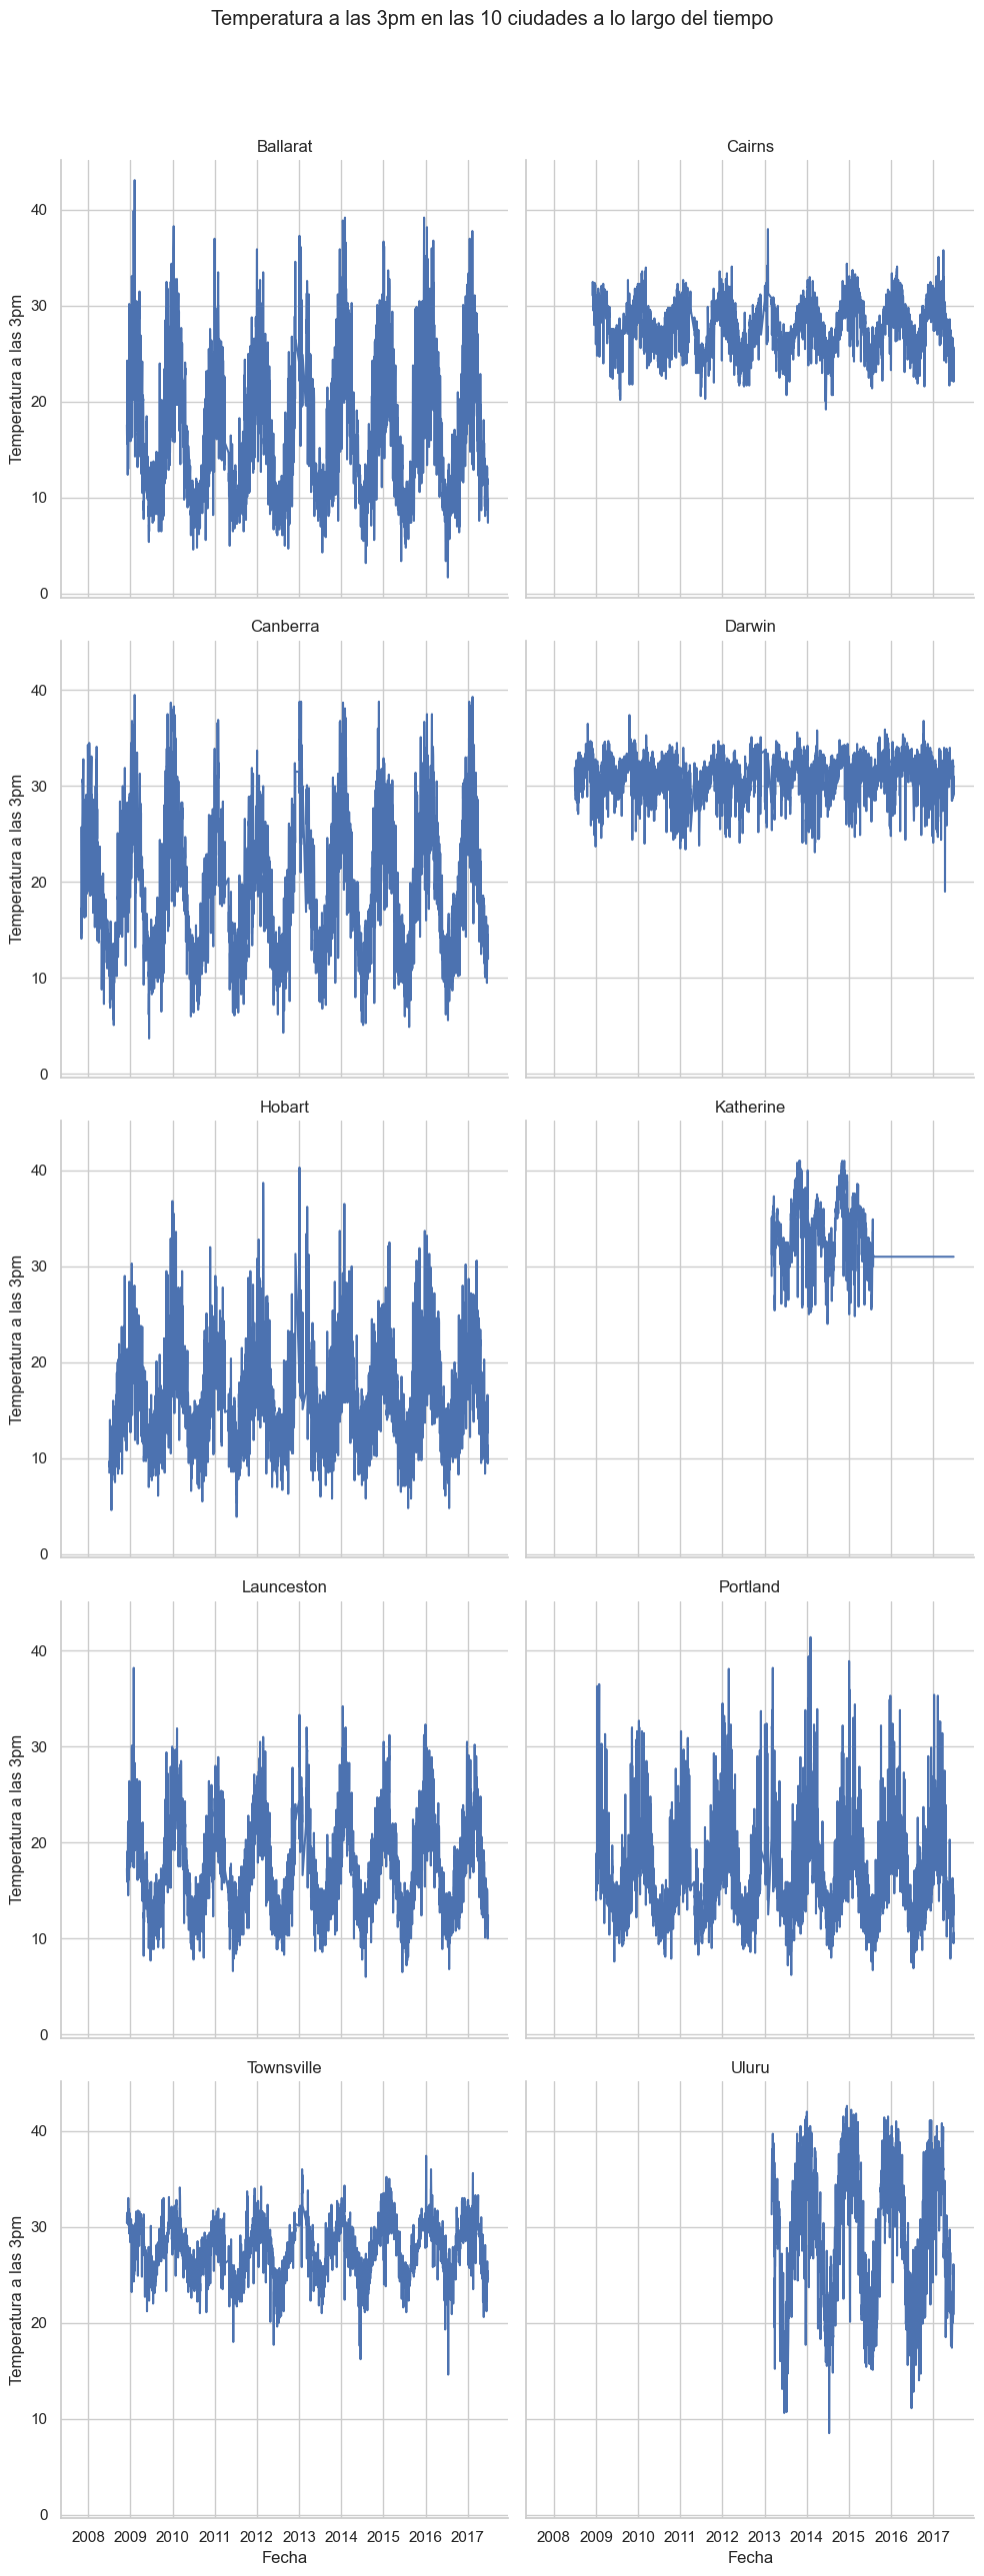

In [31]:
sns.set_theme(style="whitegrid")

g = sns.FacetGrid(df_10ciudades, col="Location", col_wrap=2, height=5, aspect=1)
g.map(sns.lineplot, "Date", "Temp3pm")

g.set_titles("{col_name}")
g.set_axis_labels("Fecha", "Temperatura a las 3pm")
g.figure.suptitle('Temperatura a las 3pm en las 10 ciudades a lo largo del tiempo', y=1.03)

plt.tight_layout()
plt.show()

Si, se observa estacionalidad en la temperatura de las 3pm en las 10 ciudades evaluadas.

#### 4.2. Realice el mismo proceso para la columna `RainToday`. ¿Se observa estacionalidad en la incidencia de lluvia?

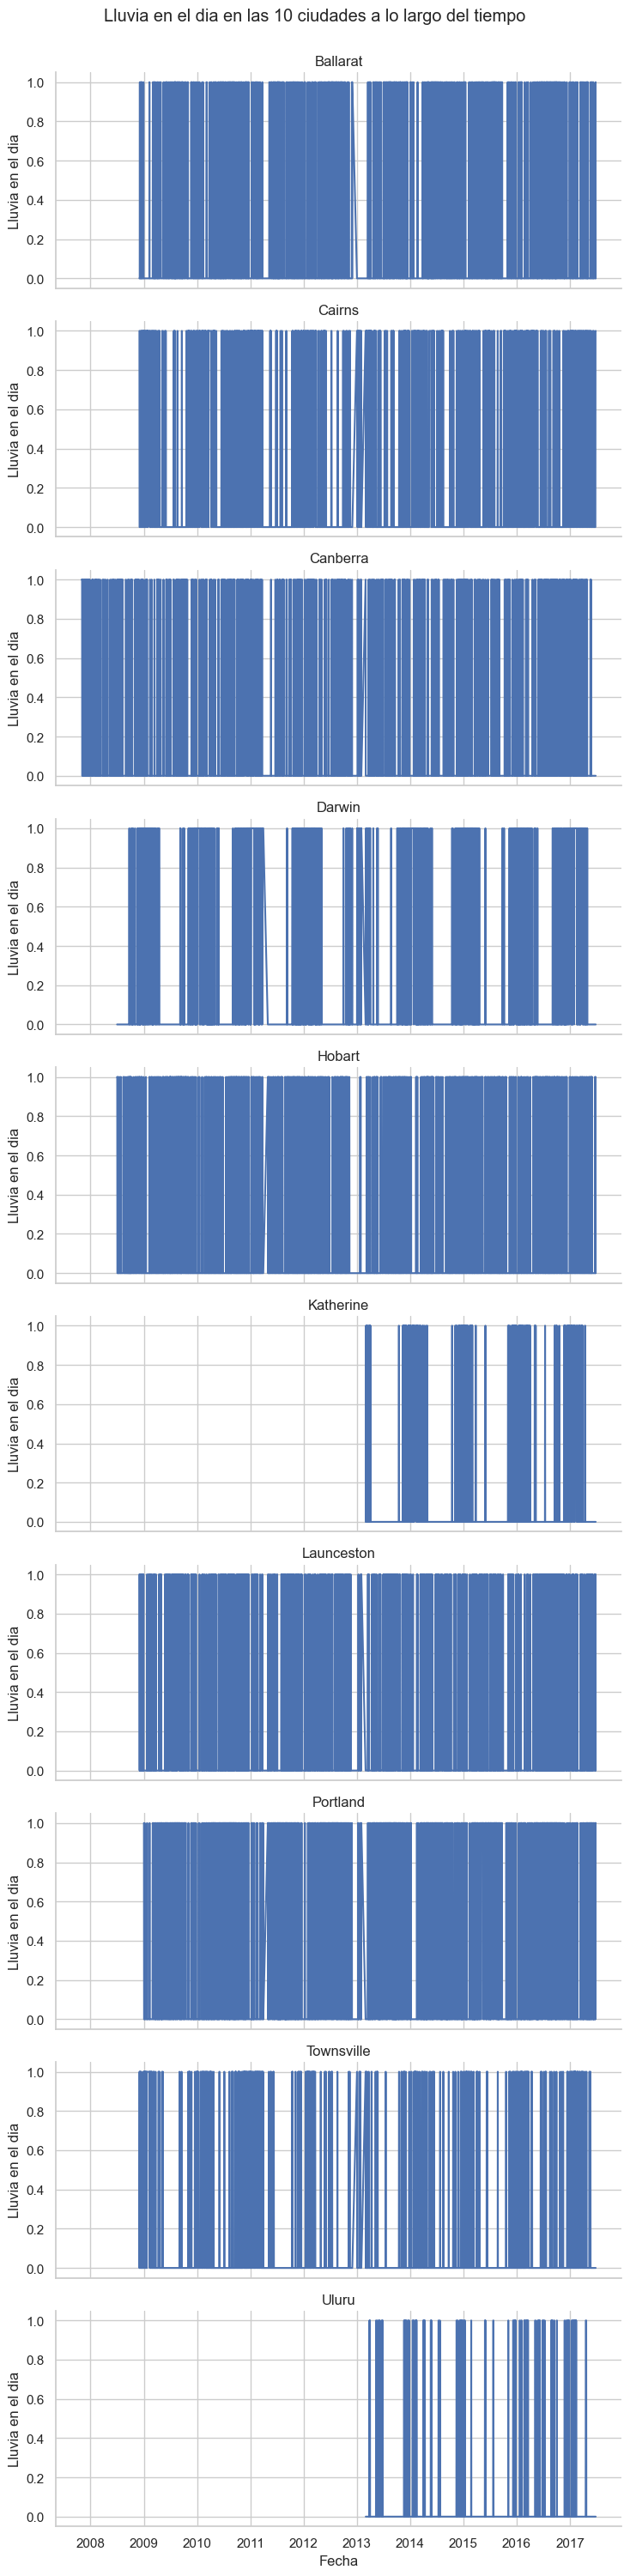

In [32]:
sns.set_theme(style="whitegrid")

g = sns.FacetGrid(df_10ciudades, col="Location", col_wrap=1, height=3, aspect=2.5)
g.map(sns.lineplot, "Date", "RainToday")

g.set_titles("{col_name}")
g.set_axis_labels("Fecha", "Lluvia en el dia")
g.figure.suptitle('Lluvia en el dia en las 10 ciudades a lo largo del tiempo', y=1)

plt.tight_layout()
plt.show()

No en todas las ciudades se pueden precisar estacionalidad, de hecho este tipo de gráfica no ayuda mucho para definir una estacionalidad de la incidencia de lluvia.

#### 4.3. Para la ciudad de `Sydney`, trace en un mismo gráfico todas las series temporales de temperatura entre los años 2012 y 2014.

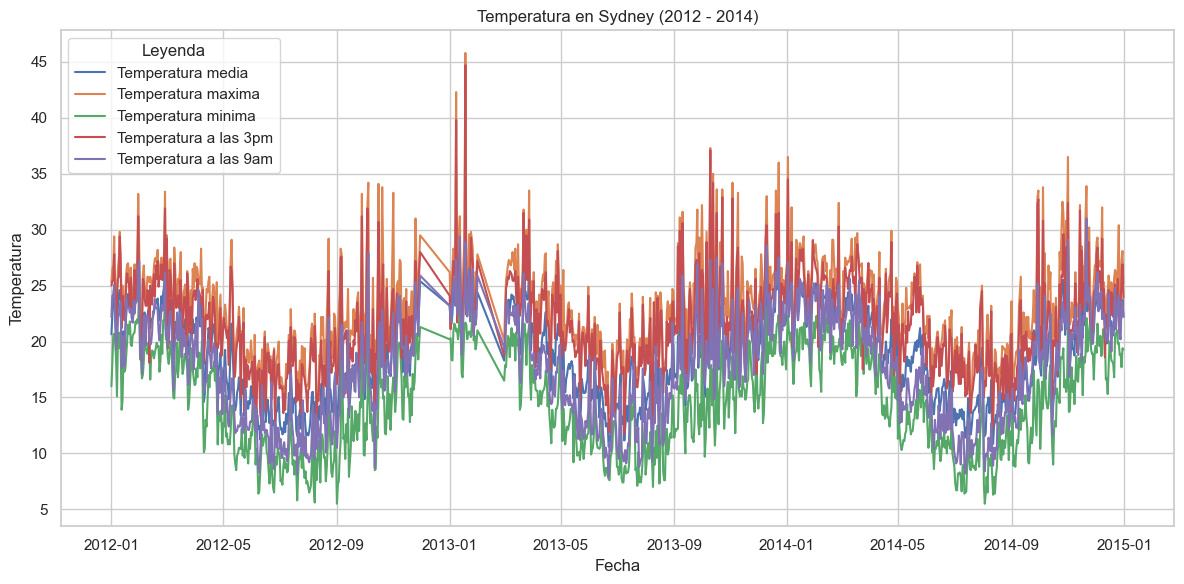

In [33]:
df_sydney = df.loc[(df['Location'] == 'Sydney') & (df['Date'].dt.year >= 2012) & (df['Date'].dt.year <= 2014)].copy()
df_sydney['Year'] = df_sydney['Date'].dt.year

plt.figure(figsize=(12, 6))

sns.lineplot(x='Date', y='Temp_media', data=df_sydney, label='Temperatura media')
sns.lineplot(x='Date', y='MaxTemp', data=df_sydney, label='Temperatura maxima')
sns.lineplot(x='Date', y='MinTemp', data=df_sydney, label='Temperatura minima')
sns.lineplot(x='Date', y='Temp3pm', data=df_sydney, label='Temperatura a las 3pm')
sns.lineplot(x='Date', y='Temp9am', data=df_sydney, label='Temperatura a las 9am')

plt.title("Temperatura en Sydney (2012 - 2014)")
plt.xlabel("Fecha")
plt.ylabel("Temperatura")
plt.legend(title="Leyenda")

plt.tight_layout()
plt.show()

### 4.4. Para las ciudades del punto 1 del Análisis Exploratorio de Datos, genere un diagrama de caja comparativo para `WindSpeed9am` y otro para `MaxTemp`.

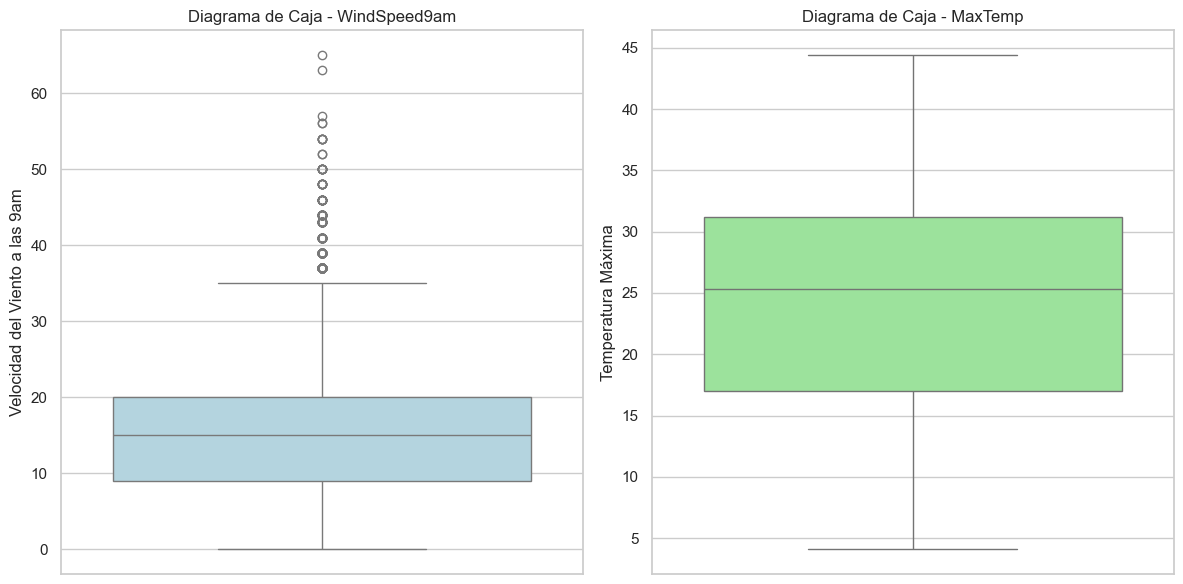

In [34]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


sns.boxplot(data=df_10ciudades, y='WindSpeed9am', ax=axes[0], color='lightblue')
axes[0].set_title('Diagrama de Caja - WindSpeed9am')
axes[0].set_ylabel('Velocidad del Viento a las 9am')

sns.boxplot(data=df_10ciudades, y='MaxTemp', ax=axes[1], color='lightgreen')
axes[1].set_title('Diagrama de Caja - MaxTemp')
axes[1].set_ylabel('Temperatura Máxima')


plt.tight_layout()
plt.show()

#### 4.5. Para las ciudades del punto 3 y 4 del Análisis Exploratorio de Datos, cree un diagrama de barras que muestre la cantidad de `Rainfall` por año.

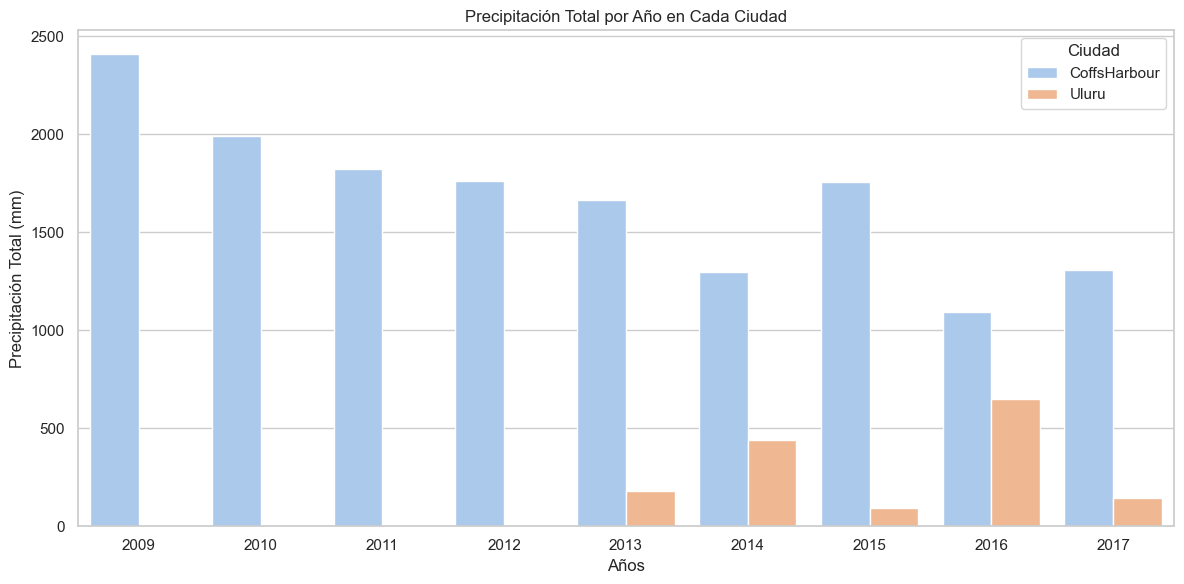

In [35]:
s2ciudades = max_precip_ciudad.nlargest(1).add(cant_lluvias.nsmallest(1), fill_value=0)
s2ciudades = s2ciudades.index.to_numpy()

df_2ciudades = df.loc[(df['Location'] == s2ciudades[0]) | (df['Location'] == s2ciudades[1])].copy()
df_2ciudades['Year'] = df_2ciudades['Date'].dt.year

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Rainfall', hue='Location', data=df_2ciudades, estimator=sum, errorbar=None, palette='pastel')

plt.title("Precipitación Total por Año en Cada Ciudad")
plt.xlabel("Años")
plt.ylabel("Precipitación Total (mm)")
plt.legend(title='Ciudad')

plt.tight_layout()
plt.show()

#### 4.6. Realice un gráfico de dispersión entre `WindGustSpeed` y `Pressure9am` para las ciudades del punto 1. Coloree los puntos por la variable `RainToday`.

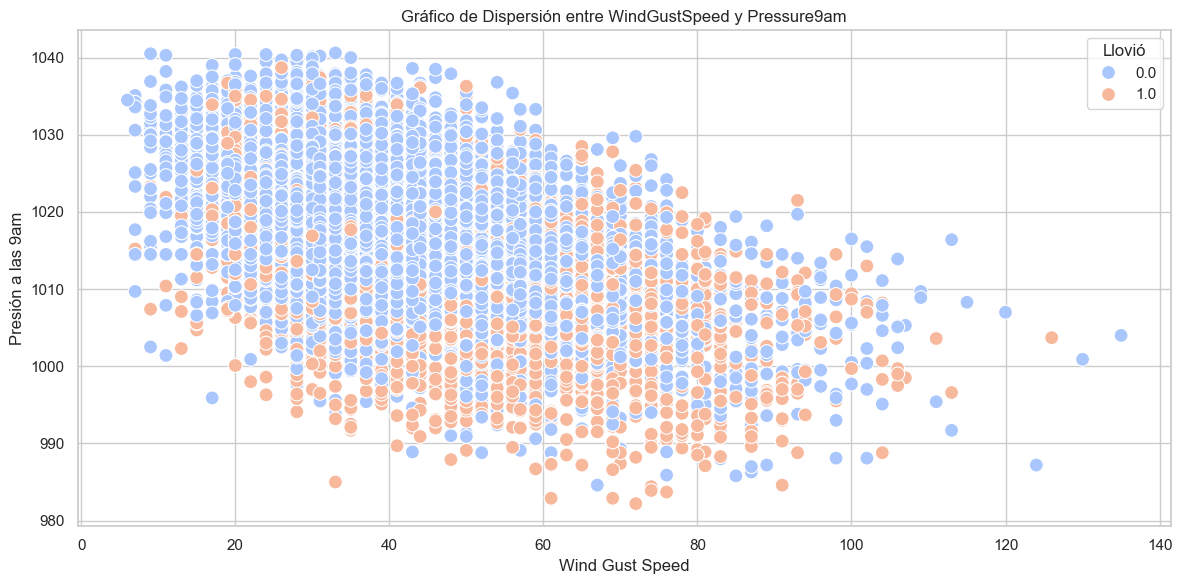

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_10ciudades, x='WindGustSpeed', y='Pressure9am', hue='RainToday', palette='coolwarm', s=100)

plt.title("Gráfico de Dispersión entre WindGustSpeed y Pressure9am")
plt.xlabel("Wind Gust Speed")
plt.ylabel("Presión a las 9am")
plt.legend(title="Llovió")

plt.tight_layout()
plt.show()

#### 4.7. Realice un gráfico de dispersión entre `MaxTemp` y `Humidity9am` para las ciudades del punto 1. Coloree los puntos por la variable `RainToday`.

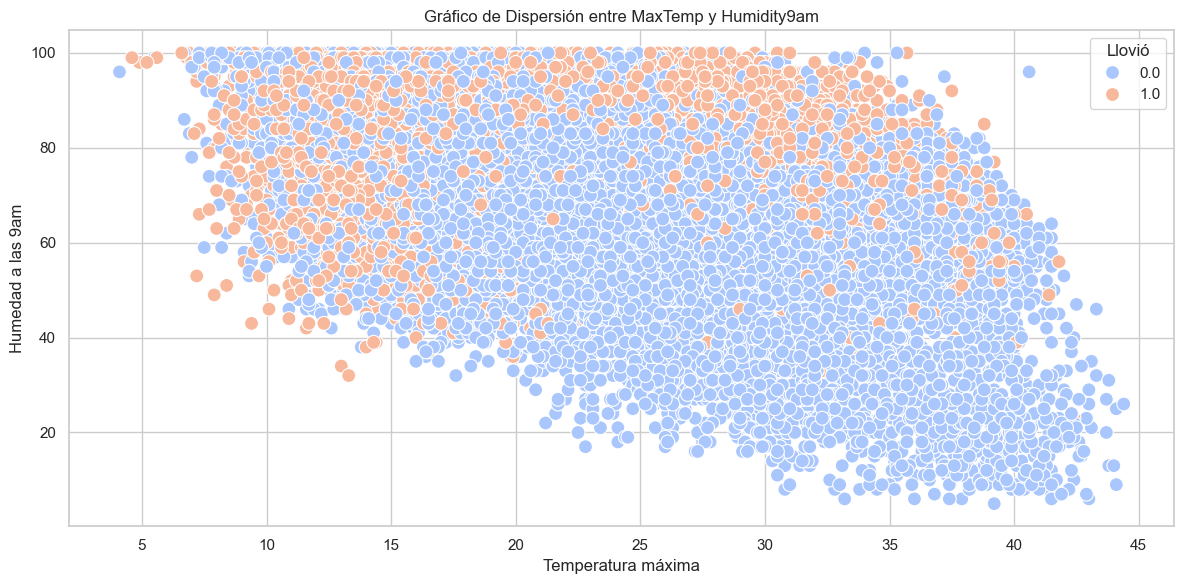

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_10ciudades, x='MaxTemp', y='Humidity9am', hue='RainToday', palette='coolwarm', s=100)

plt.title("Gráfico de Dispersión entre MaxTemp y Humidity9am")
plt.xlabel("Temperatura máxima")
plt.ylabel("Humedad a las 9am")
plt.legend(title="Llovió")

plt.tight_layout()
plt.show()

### Conclusiones

#### Resumir los hallazgos más relevantes obtenidos del análisis de datos.

* La limpieza de datos es muy importante para evitar error de cálculos o interpretaciones, por lo cual es vital realizar la limpieza y preprocesamiento de los datos antes de realizar el análisis.
* Asi como es importante la limpieza de datos, el manejar el formato correcto de cada atributo es necesario para la correcta interpretación de los datos.
* Todo criterio que se plantee para ajustar los datos, como por ejemplo el completar los valores faltantes, debe ser documentado para que se tenga un registro al cual acudir en caso que se requiera.
* El análisis de datos nos permite identificar patrones, similitudes, estacionalidad, correlación, etc.
* Respecto a la correlación de RainTomorrow, se puede identificar que atributos como Humidity3pm,Cloud3pm, RainToday y Sunshine se presentan los mejores valores, sin embargo, la correlación es débil lo cual no nos permite encontrar una correlación.
* La visualización de los datos nos permite encontrar que hay estacionalidad de la temperatura a lo largo del tiempo, sin embargo, para la variable RainToday, no se puede visualizar una estacionalidad marcada.
* Respecto a la ciudad de Sydney se ve una marcada estacionalidad de la temperatura año a año.
* Por otro lado, gráficas como diagrama de caja nos permiten encontrar outliers, como se pudo visualizar en la gráfica de la velocidad del viento a las 9am.
* Gráficos como el diagrama de barras nos permite comparar las precipitaciones anuales entre ciudades, en el informe se identifico que las precipitaciones de CoffsHarbour son mucho mayores que las de Uluru.
* Los gráficos de dispersión son muy útiles para identificar correlación entre 2 o mas variables.

#### Guarde el dataset limpio y ordenado para siguientes TPs en un `csv`, previo al guardado, elimina todas las filas que tienen datos incompletos de `RainTomorrow`.

In [38]:
# Se eliminan las filas con valores nulos en la columna 'RainTomorrow'

df = df.dropna(subset=['RainTomorrow'])

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Cloud9am         0
Cloud3pm         0
Temp_media       0
amp_viento       0
dtype: int64

In [39]:
# Guardar el dataframe limpio en un archivo CSV

df.to_csv('weatherAUS_limpio.csv', index=False)